<a href="https://colab.research.google.com/github/fuse999/AB-Demo/blob/master/module3/assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
import pandas as pd
df = pd.read_csv('gradcafe.csv')

In [0]:
df.decision.value_counts()

Accepted    1310840
Rejected    1272526
Others      1120158
Name: decision, dtype: int64

In [0]:
# Removeing others values
df = df[df.decision != 'Others']
df = df.replace({'Accepted':1, 'Rejected':0})

In [0]:
df.decision.value_counts()

1    1310840
0    1272526
Name: decision, dtype: int64

In [0]:
df = df.dropna()

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,
                               stratify=df['decision'],
                               random_state=59)

train, val = train_test_split(train, test_size=0.25,
                              stratify=train['decision'],
                              random_state=59)
train.shape, val.shape, test.shape

((426415, 14), (142139, 14), (142139, 14))

In [0]:
from sklearn.metrics import accuracy_score
y_pred = [1] * len(df['decision'])
accuracy_score(df['decision'], y_pred)

0.5612310800866197

In [0]:
def wrangle(X):
# Wrangle train, validate, and test sets
    
    # Prevent SettingWithCopyWarning (in acordince with lectuere)
    X = X.copy()
  
    
      # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# creating target and features lsts
target = 'decision'
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features = numeric_features + categorical_features
print(features)

['gre_quant', 'gre_verbal', 'term_year', 'undergrad_gpa', 'gre_awa', 'degree', 'season', 'applicant_status']


In [0]:
# creating Train, Validation, and Test vars
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestClassifier(n_estimators=350, random_state=42, n_jobs=3)
)

# Fit on train, score on val
#pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.904804451980104


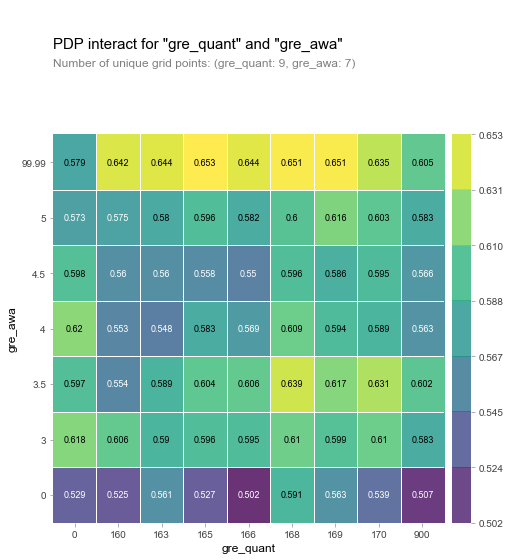

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['gre_quant', 'gre_awa']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

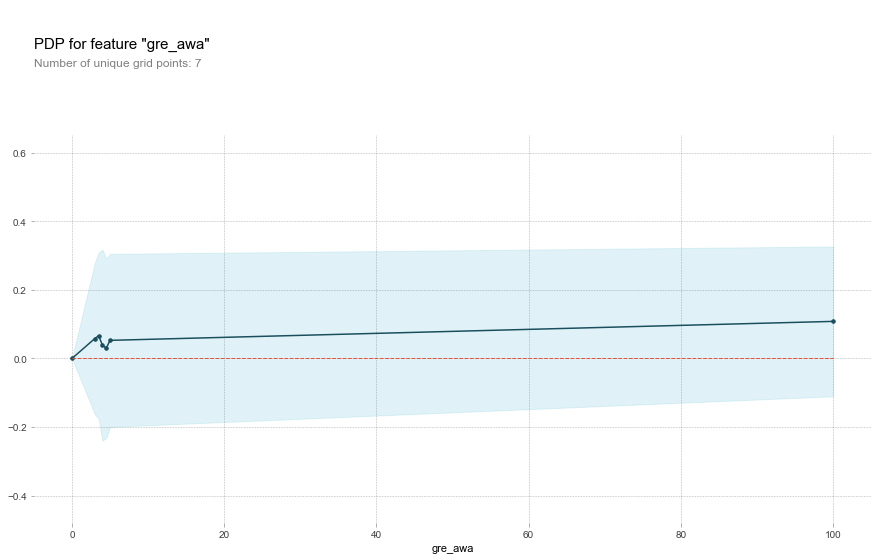

In [0]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'gre_awa'
pdp_dist = pdp.pdp_isolate(model=pipeline,
                           dataset=X_train,
                           model_features=features,
                           feature=feature)
pdp.pdp_plot(pdp_dist, feature);